In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Height': [170, 165, 180, 175, 160, 172, 168, 177, 162, 158],
    'Weight': [65, 59, 75, 68, 55, 70, 62, 74, 58, 54],
    'Age': [30, 25, 35, 28, 22, 32, 27, 33, 24, 21],
    'Gender': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0] 
}


In [7]:
df = pd.DataFrame(data)
df
X = df.drop('Gender', axis=1)
y = df['Gender']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.18419807,  0.13867505,  0.50910379],
       [-0.52425605, -0.69337525, -0.59764358],
       [ 1.60110632,  1.52542554,  1.61585117],
       [ 0.8926522 ,  0.5547002 ,  0.06640484],
       [-1.23271018, -1.24807544, -1.26169201],
       [ 0.46757972,  0.83205029,  0.95180275],
       [-0.09918358, -0.2773501 , -0.15494463],
       [ 1.17603385,  1.38675049,  1.17315222],
       [-0.94932853, -0.83205029, -0.81899306],
       [-1.51609183, -1.38675049, -1.48304149]])

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
X_train


array([[ 0.47934953,  0.24005867],
       [ 2.15777883, -0.01054754],
       [ 2.73763841,  0.01704297],
       [-2.53171635,  0.01540757],
       [-2.16068418, -0.02240454],
       [ 0.87462551, -0.58608547],
       [-0.30743041, -0.03219976]])

In [9]:

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm


array([[2, 0],
       [0, 1]])

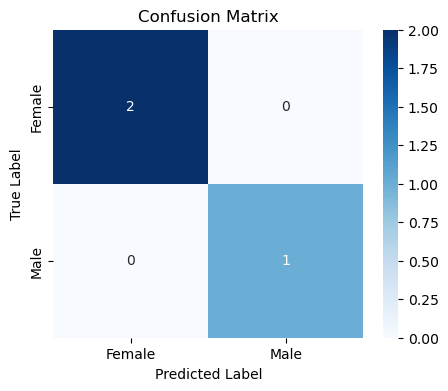

In [10]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


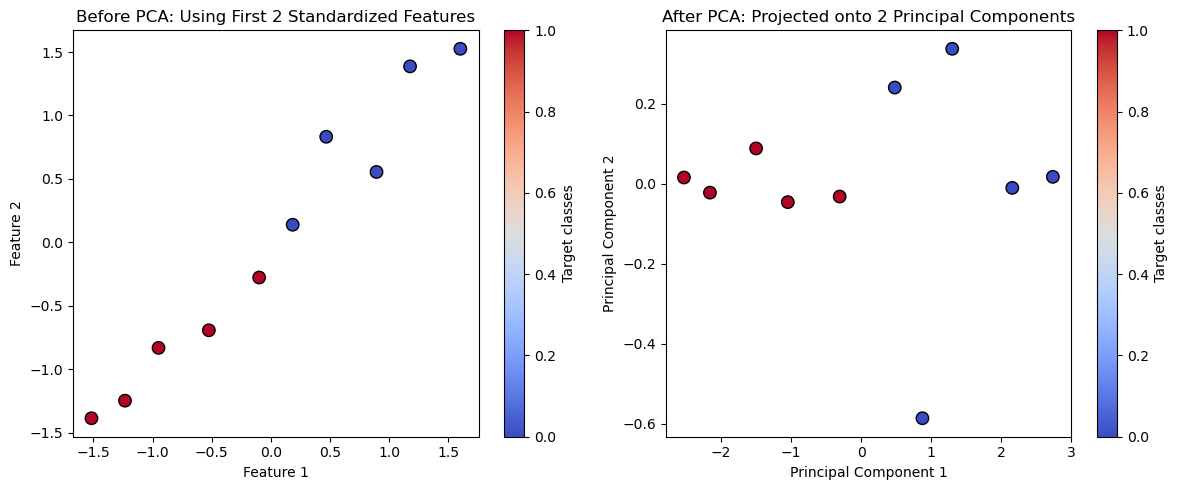

In [11]:
y_numeric = pd.factorize(y)[0]
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Before PCA: Using First 2 Standardized Features')
plt.colorbar(label='Target classes')
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA: Projected onto 2 Principal Components')
plt.colorbar(label='Target classes')
plt.tight_layout()
plt.show()
